### Small Image Classification Using Convolutional Neural Network (CNN)


- In this notebook, we will classify small images `cifar10` dataset from `tensorflow keras` datasets. 
- There are total `10` classes as shown below. 

<img src="images/cnn/cifar.png" width=800>

- The dataset has `60000` images of `32 X 32` in `10` classes, with `6000` images per class. There are `50000` training and `10000` test images.
- We will use `CNN` for classification.
- The dataset is divided into five training batches, and one test batch each with `10000` images. The test batch contains exactly `1000` randomly selected images from each class.
- The training batches contain images in random order but some training batches may contain more images from one class than another. Between them the training batches contain exactly `5000` images from each class.

<hr style="border:2px solid black">

In [42]:
# Importing the libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [2]:
# The "load_data()" returns the training and test set
# (50000, 32, 32, 3) means there are 50000 images of 32X32 pixels and each image and 3 is for rgb channels

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape, X_test.shape

170498071/170498071 [==============================] - 17s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
# Checking the training sample of 0th index

X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
# Checking the values(categories) from the y
# Here we are getting 2d arrays but we need just the category

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# So reshaping the y_train
# The way we are reshaping is that keeping the 1st dimension (i.e. 10000) as it is so we use "-1"
# We want to flatten the 2nd dimension so leaving it blank

y_train = y_train.reshape(-1, )

# Now again checking the first 5 categories
# Now we can see an 1d array

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
# Creating the labels of the classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
# Now if we pass the array number of the category

classes[9]

'truck'

In [30]:
# Plotting the image
# Using the "imshow()" of matplotlib for that
# Creating a function for that



def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

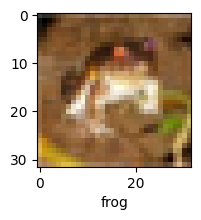

In [31]:
# Now getting the image of the 0th index of the training sample

plot_sample(X_train, y_train, 0)

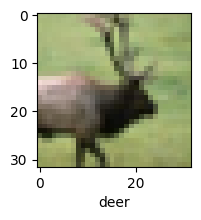

In [32]:
plot_sample(X_train, y_train, 34)

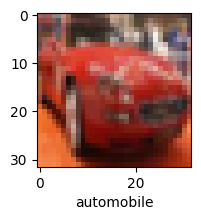

In [33]:
plot_sample(X_train, y_train, 5)

**Normalizing the data**

- That is dividing the pixel sizes between `0` to `1` range

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Building simple artificial neural network for image classification**

- Here we want to check the performance of the `ANN`.

In [20]:
# Here the input layer is a flatten layer
# Then we have 2 hidden layers having 3000 and 1000 neurons respectively
# Finaly we have the output layer with 10 categories

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 134s 85ms/step - loss: 1.8158 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 123s 78ms/step - loss: 1.6238 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5424 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4824 - accuracy: 0.4800
Epoch 5/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4321 - accuracy: 0.4955


**Here we have used `sparse_categorical_crossentropy` as `loss`**

- The difference between this and the `categorical_crossentropy` is:

<img src="images\cnn\loss.png" width=800>

- Whenever we have the variable `y` as `One Hot Encoded` vector as here the image of `ship` which is indexed at `9` and the output `y` is `One Hot Encoded` so we need to use the `categorical_crossentropy`.
- But if `y` is directly a value like number `8` as in this case we need to use `sparse_categorical_crossentropy`.


<hr style="border:2px solid black">

In [22]:
# Evaluating the model

ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4620 - accuracy: 0.4827


[1.4619860649108887, 0.482699990272522]

**We can see that at the end of 5 epochs, accuracy is at around `49%` for the training set and `47%` for the test set.**

- So the performance of `ANN` on this dataset is really bad.

In [21]:
# Printing the classification report

from sklearn.metrics import confusion_matrix , classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.43      0.52      1000
           1       0.61      0.59      0.60      1000
           2       0.44      0.23      0.30      1000
           3       0.44      0.18      0.25      1000
           4       0.37      0.47      0.41      1000
           5       0.49      0.28      0.36      1000
           6       0.45      0.66      0.54      1000
           7       0.41      0.71      0.52      1000
           8       0.61      0.62      0.62      1000
           9       0.47      0.67      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



**Now let us build a convolutional neural network to train our images**

In [23]:
# Here we will have couple of layers "Convolutional + ReLU" and "Pooling" for Feature Extraction.
# Then we will have a Dense Layer for Classification.
# Here the 1st cnn layer "Conv2D()" is for convolutional layer and the "MaxPooling()" is for Pooling layer.
# Here we have 32 filters with a filter size of 3X3 used "kernel_size()" for that.
# The input shape is 32X32X3.
# The 2nd cnn layer don't need the input shape as it will detect it itself.
# Here the dense layer is the "Dense()"
# It has 10 as the categories

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
# Here we use "adam" as optimizer and "sparse_categorical_crossentropy" as loss

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4340 - accuracy: 0.4871
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0985 - accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9752 - accuracy: 0.6595
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8938 - accuracy: 0.6902
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8322 - accuracy: 0.7113
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7797 - accuracy: 0.7288
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7320 - accuracy: 0.7454
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6867 - accuracy: 0.7629
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6511 - accuracy: 0.7735
Epoch 10/10
1563/1563 [==============================] - 51s 33m

**With CNN, at the end 5 epochs, accuracy was at around `71%` which is a significant improvement over `ANN`. At the end of 10 epochs the accuracy is `78%`. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple `ANN` as `maxpooling` reduces the image dimensions while still preserving the features.**

In [26]:
# Evaluating the model

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9426 - accuracy: 0.6918


[0.9425991177558899, 0.6917999982833862]

**Here for the test data we get around `69%` accuracy instead of the `47%` of the `ANN` model.**

In [28]:
# We need to reshape our y_test dataset as well

y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

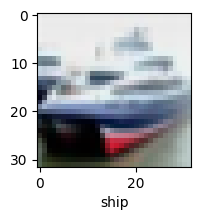

In [34]:
# Getting the 1st indexed image of the test dataset

plot_sample(X_test, y_test, 1)

In [35]:
# Predicting all the test samples and then getting the 1st 5 values

y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[3.2841030e-04, 1.7049543e-04, 8.9553714e-04, 8.2090563e-01,
        2.2317973e-04, 9.6516922e-02, 4.3192765e-04, 5.9637066e-04,
        7.9721346e-02, 2.1014680e-04],
       [7.2050281e-03, 5.4927510e-01, 5.3997783e-06, 3.0849467e-05,
        2.1965009e-06, 2.4462504e-06, 7.6415255e-08, 1.2168582e-06,
        4.4224414e-01, 1.2335428e-03],
       [5.9051692e-01, 1.7502813e-01, 1.7881464e-02, 3.8793996e-02,
        2.1729825e-02, 1.2050871e-02, 6.9569977e-04, 9.0739513e-03,
        7.4592613e-02, 5.9636496e-02],
       [6.1472505e-01, 9.1431148e-02, 1.4112883e-02, 3.3837941e-03,
        4.3785833e-03, 2.5295021e-04, 1.7992887e-04, 8.9581103e-05,
        2.7127838e-01, 1.6766114e-04],
       [3.5038155e-08, 9.6021813e-06, 1.3746957e-03, 2.6052276e-02,
        9.4670862e-01, 1.8053850e-03, 2.4029231e-02, 1.8671368e-05,
        5.1112949e-07, 1.0904729e-06]], dtype=float32)

In [38]:
# Now as we have used 'softmax' as the final activation function in CNN model so all the values are between 0 and 1
# So now we need to use the argmax() to find which index has the highest value

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 0, 0, 4]

In [37]:
# Checking the actual categories from test dataset

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

- It will make some errors as the accuracy is of `70%`.

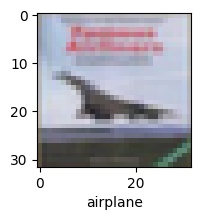

In [39]:
# Getting the actual image of 3rd

plot_sample(X_test, y_test, 3)

In [41]:
# Checking the predicted value of the same eliment

classes[y_classes[3]]

'airplane'

In [43]:
# Printing classification report for cnn

print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      1000
           1       0.73      0.88      0.80      1000
           2       0.64      0.53      0.58      1000
           3       0.46      0.56      0.51      1000
           4       0.63      0.68      0.65      1000
           5       0.57      0.63      0.60      1000
           6       0.84      0.67      0.75      1000
           7       0.79      0.72      0.75      1000
           8       0.82      0.78      0.80      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

